<a href="https://colab.research.google.com/github/katerinakazantseva/scientific_python/blob/master/Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. In the model RAW264_7.xml please define minimal medium that can maintain cell growth in anaerobic conditions. Compare it with the minimal medium that can maintain cell growth in aerobic conditions. Visualize and describe these differences.


In [110]:
#!pip install cobra
import cobra
model = cobra.io.read_sbml_model("RAW264_7.xml")


Streaming output truncated to the last 5000 lines.
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_D_c "D-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_D_e "D-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_D_x "D-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_L_c "L-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_L_e "L-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_L_x "L-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_alpa_hs_c "lysophosphatidic acid (homo sapiens)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFor

In [13]:
model

Name,
Memory address,0x07f7f1ce4f250
Number of metabolites,1005
Number of reactions,1389
Number of groups,75
Objective expression,1.0*biomass - 1.0*biomass_reverse_01e59
Compartments,"Cytoplasm, Lysosome, Mitochondrion, Extracellular, Peroxisome, Endoplasmic_reticulum, Nucleus, Golgi"


In [14]:
#model.medium

{'EX_Lcystin_LPAREN_e_RPAREN_': 1.0,
 'EX_arg_L_LPAREN_e_RPAREN_': 0.02375,
 'EX_chol_LPAREN_e_RPAREN_': 10000.0,
 'EX_cl_LPAREN_e_RPAREN_': 10000.0,
 'EX_glc_LPAREN_e_RPAREN_': 0.2718,
 'EX_gln_L_LPAREN_e_RPAREN_': 0.0765,
 'EX_gly_LPAREN_e_RPAREN_': 0.1,
 'EX_h2o_LPAREN_e_RPAREN_': 10000.0,
 'EX_h_LPAREN_e_RPAREN_': 10000.0,
 'EX_his_L_LPAREN_e_RPAREN_': 0.1,
 'EX_ile_L_LPAREN_e_RPAREN_': 0.1,
 'EX_inost_LPAREN_e_RPAREN_': 0.1,
 'EX_leu_L_LPAREN_e_RPAREN_': 0.03622,
 'EX_lys_L_LPAREN_e_RPAREN_': 0.1,
 'EX_met_L_LPAREN_e_RPAREN_': 0.1,
 'EX_na1_LPAREN_e_RPAREN_': 10000.0,
 'EX_nh4_LPAREN_e_RPAREN_': 10000.0,
 'EX_o2_LPAREN_e_RPAREN_': 0.3066,
 'EX_ocdca_LPAREN_e_RPAREN_': 0.1,
 'EX_ocdcea_LPAREN_e_RPAREN_': 0.0192,
 'EX_phe_L_LPAREN_e_RPAREN_': 0.1,
 'EX_pi_LPAREN_e_RPAREN_': 10000.0,
 'EX_pyr_LPAREN_e_RPAREN_': 0.0568,
 'EX_ribflv_LPAREN_e_RPAREN_': 1.0,
 'EX_ser_L_LPAREN_e_RPAREN_': 0.1,
 'EX_so4_LPAREN_e_RPAREN_': 10000.0,
 'EX_thr_L_LPAREN_e_RPAREN_': 0.1,
 'EX_trp_L_LPAREN_e_RPAR

In [113]:
from cobra.medium import minimal_medium

max_growth = model.slim_optimize()
aer=minimal_medium(model, max_growth)
aer

EX_Lcystin_LPAREN_e_RPAREN_    0.316246
EX_arg_L_LPAREN_e_RPAREN_      0.023750
EX_chol_LPAREN_e_RPAREN_       0.001573
EX_glc_LPAREN_e_RPAREN_        0.271800
EX_gln_L_LPAREN_e_RPAREN_      0.076500
EX_gly_LPAREN_e_RPAREN_        0.100000
EX_h2o_LPAREN_e_RPAREN_        0.065385
EX_his_L_LPAREN_e_RPAREN_      0.100000
EX_ile_L_LPAREN_e_RPAREN_      0.090695
EX_inost_LPAREN_e_RPAREN_      0.000153
EX_leu_L_LPAREN_e_RPAREN_      0.028791
EX_lys_L_LPAREN_e_RPAREN_      0.063495
EX_met_L_LPAREN_e_RPAREN_      0.005160
EX_o2_LPAREN_e_RPAREN_         0.306600
EX_ocdca_LPAREN_e_RPAREN_      0.000160
EX_ocdcea_LPAREN_e_RPAREN_     0.004016
EX_phe_L_LPAREN_e_RPAREN_      0.008734
EX_pi_LPAREN_e_RPAREN_         0.014347
EX_pyr_LPAREN_e_RPAREN_        0.056800
EX_thr_L_LPAREN_e_RPAREN_      0.012380
EX_trp_L_LPAREN_e_RPAREN_      0.002840
EX_ttdca_LPAREN_e_RPAREN_      0.003931
EX_tyr_L_LPAREN_e_RPAREN_      0.006367
EX_val_L_LPAREN_e_RPAREN_      0.048241
dtype: float64

In [114]:
model2=model
medium = model2.medium
medium["EX_o2_LPAREN_e_RPAREN_"] = 0.0
model2.medium = medium

max_growth = model2.slim_optimize()
anaer=minimal_medium(model2, max_growth)
anaer

EX_Lcystin_LPAREN_e_RPAREN_    0.289174
EX_arg_L_LPAREN_e_RPAREN_      0.023750
EX_chol_LPAREN_e_RPAREN_       0.000727
EX_glc_LPAREN_e_RPAREN_        0.271800
EX_gln_L_LPAREN_e_RPAREN_      0.076500
EX_gly_LPAREN_e_RPAREN_        0.100000
EX_h2o_LPAREN_e_RPAREN_        0.298020
EX_his_L_LPAREN_e_RPAREN_      0.100000
EX_ile_L_LPAREN_e_RPAREN_      0.004891
EX_inost_LPAREN_e_RPAREN_      0.000071
EX_leu_L_LPAREN_e_RPAREN_      0.013307
EX_lys_L_LPAREN_e_RPAREN_      0.006630
EX_met_L_LPAREN_e_RPAREN_      0.002385
EX_ocdca_LPAREN_e_RPAREN_      0.000074
EX_ocdcea_LPAREN_e_RPAREN_     0.001856
EX_phe_L_LPAREN_e_RPAREN_      0.004037
EX_pi_LPAREN_e_RPAREN_         0.006632
EX_pyr_LPAREN_e_RPAREN_        0.056800
EX_thr_L_LPAREN_e_RPAREN_      0.005722
EX_trp_L_LPAREN_e_RPAREN_      0.001313
EX_ttdca_LPAREN_e_RPAREN_      0.001817
EX_tyr_L_LPAREN_e_RPAREN_      0.002943
EX_val_L_LPAREN_e_RPAREN_      0.006543
dtype: float64

In [126]:
import numpy as np
import pandas as pd


frame = { 'Names': aer.index,'Aerobic': aer, 'Anaerobic': anaer }
result = pd.DataFrame(frame)
result

,Names,variable,value
0,EX_Lcystin_LPAREN_e_RPAREN_,Aerobic,0.316246
1,EX_arg_L_LPAREN_e_RPAREN_,Aerobic,0.023750
2,EX_chol_LPAREN_e_RPAREN_,Aerobic,0.001573
3,EX_glc_LPAREN_e_RPAREN_,Aerobic,0.271800
4,EX_gln_L_LPAREN_e_RPAREN_,Aerobic,0.076500
5,EX_gly_LPAREN_e_RPAREN_,Aerobic,0.100000
6,EX_h2o_LPAREN_e_RPAREN_,Aerobic,0.065385
7,EX_his_L_LPAREN_e_RPAREN_,Aerobic,0.100000
8,EX_ile_L_LPAREN_e_RPAREN_,Aerobic,0.090695
9,EX_inost_LPAREN_e_RPAREN_,Aerobic,0.000153


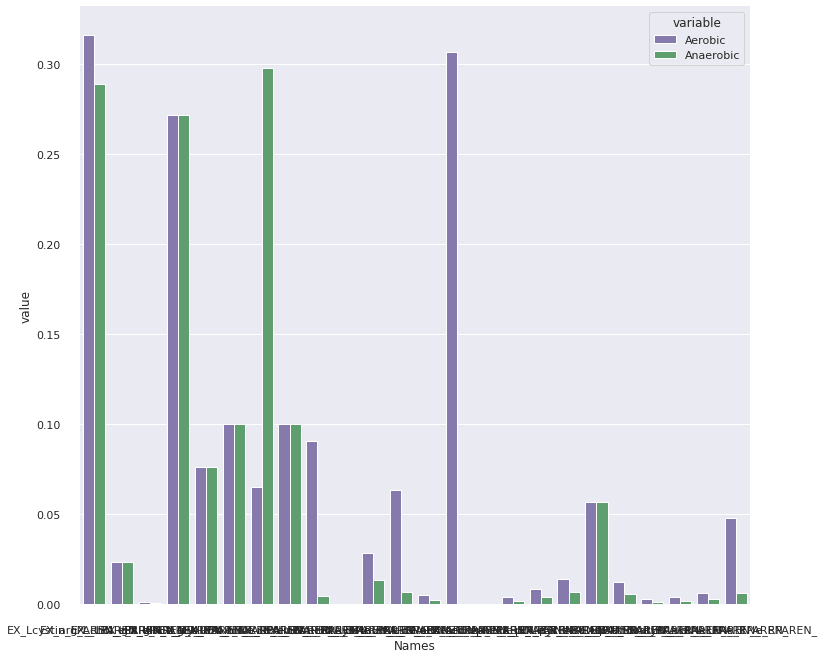

In [133]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


formatted_df = pd.melt(
    frame = result,
    id_vars = "Names")


sns.set(rc={'figure.figsize':(12,11)})
sns.barplot(x='Names', y='value',
            hue="variable", palette=["m", "g"],
            data=formatted_df)
sns.despine(offset=10, trim=True)


2. For the load_breast_cancer dataset from sklearn.datasets build classification models by the means of Logistic Regression and Decision Trees. Compare the results obtained by these two models (remember how we perform classification problem results). List the features that were defined by each of the models as the most important. Select the most optimal model and justify your choice.


In [207]:
#!pip  install sklearn
import sklearn
data=sklearn.datasets.load_breast_cancer(return_X_y=False)


In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from termcolor import colored as cl # text customization
import itertools 
from sklearn.datasets import load_breast_cancer

X=data.data
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y)
LR=LogisticRegression(solver = 'liblinear')

LR.fit(X_train,y_train)
LR.score(X_test,y_test)

lr=LR.fit(X_train,y_train)

LR.coef_




array([[ 1.36,  0.1 ,  0.19, -0.01, -0.13, -0.25, -0.44, -0.23, -0.11,
        -0.02,  0.07,  1.37,  0.46, -0.14, -0.01,  0.01, -0.05, -0.03,
         0.01,  0.01,  1.35, -0.3 , -0.26, -0.02, -0.24, -0.86, -1.34,
        -0.45, -0.26, -0.09]])

In [191]:
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.29      0.28      0.29        54
           1       0.58      0.60      0.59        89

    accuracy                           0.48       143
   macro avg       0.44      0.44      0.44       143
weighted avg       0.47      0.48      0.47       143



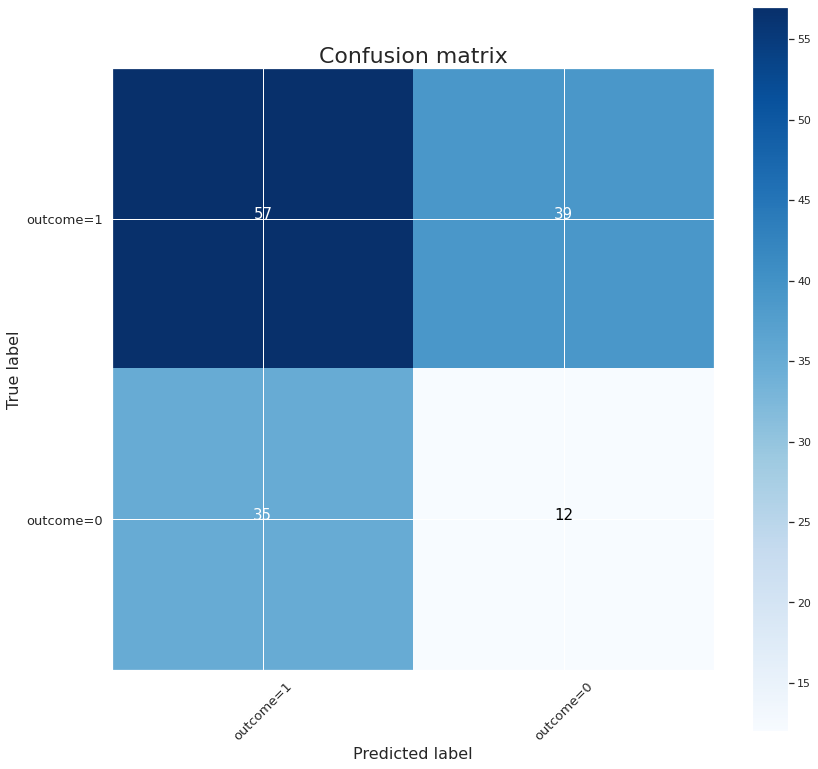

In [166]:
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plot_confusion_matrix(cnf_matrix, classes = ['outcome=1','outcome=0'], 
                      normalize = False,  
                      title = 'Confusion matrix')

Text(0.5, 1.0, 'LogisticRegression')

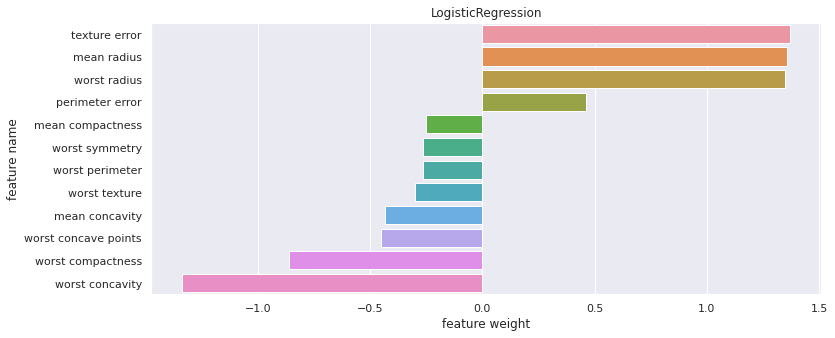

In [212]:
plt.figure(figsize=(12, 5))
data = pd.DataFrame()
from sklearn.datasets import load_breast_cancer
data['feature weight'] = LR.coef_[0]
data['feature name'] = load_breast_cancer().feature_names
data = data[np.abs(data['feature weight']) > 0.25]
data = data.sort_values(by='feature weight', ascending=False)
sns.barplot(x='feature weight', y='feature name', data=data)
plt.title('LogisticRegression')

In [209]:
from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz,
    )
import graphviz
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from IPython.display import SVG

def build_tree(max_depth=None):
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X_train, y_train)
    print("Max Depth: {0}".format(max_depth))
    print("Training Accuracy: {0:.2f}".format(tree.score(X_train, y_train)))
    print("Testing Accuracy: {0:.2f}".format(tree.score(X_test, y_test)))
    print()
    return

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
DT=tree.fit(X_train, y_train)


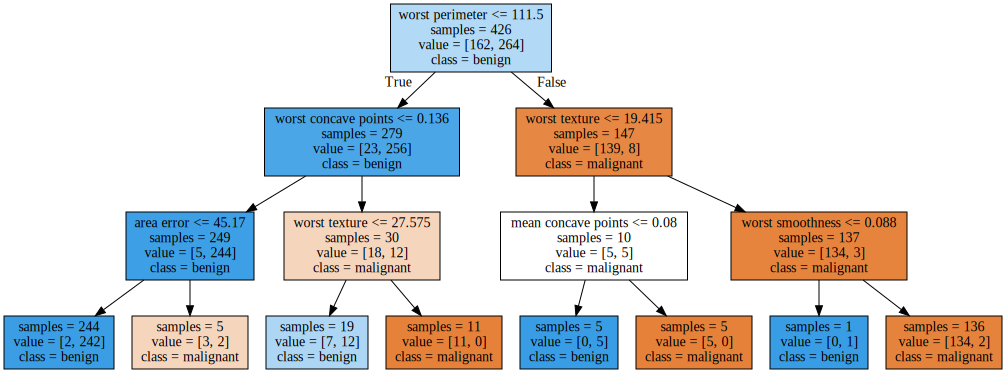

In [210]:
graph = Source(export_graphviz(tree, out_file=None, class_names=load_breast_cancer().target_names,
                feature_names=load_breast_cancer().feature_names, impurity=False,
                filled=True))

display(SVG(graph.pipe(format='svg')))

Text(0.5, 1.0, 'DecisionTreeClassifier')

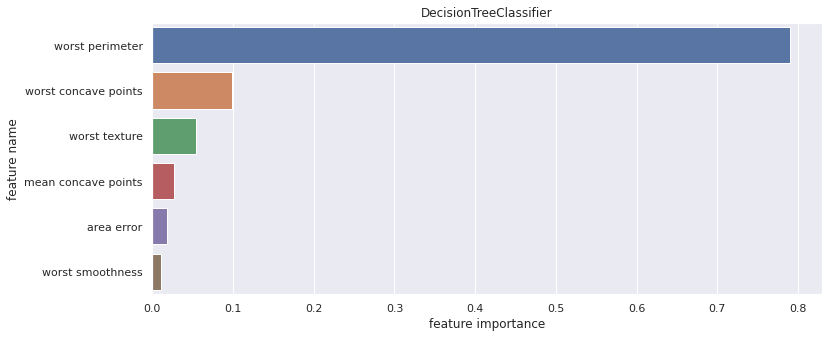

In [214]:

plt.figure(figsize=(12, 5))
data = pd.DataFrame()
data['feature importance'] = tree.feature_importances_
data['feature name'] = load_breast_cancer().feature_names
data = data[data['feature importance'] != 0]
data = data.sort_values(by='feature importance', ascending=False)
sns.barplot(x='feature importance', y='feature name', data=data)
plt.title('DecisionTreeClassifier')

In [203]:
print(classification_report(y_test, DT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.94      0.98      0.96        89

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143




3. By the means of Biopython build the phylogenetic tree for the sequences from aeromonade.fasta file. Also find some region that could differentiate LC499765.1 from other sequences and draw ~20bp consensus logo for this region.

In [217]:
!pip install Bio
from Bio import Phylo






SyntaxError: ignored

In [245]:
from Bio.Align.Applications import ClustalwCommandline
clustalw = "clustalw2.exe"

cline = ClustalwCommandline("clustalw", infile="aeromonade.fasta", outfile="aeromonade.aln")
print (cline)



clustalw -infile=aeromonade.fasta -outfile=aeromonade.aln


In [244]:
from Bio import Phylo
tree = Phylo.read("aeromonade.dnd", "newick")
Phylo.draw_ascii(tree)

                                    ______________________________ LC499765.1
  _________________________________|
 |                                 | MN493074.1
 |
_|                     ________ MG063201.1
 |____________________|
 |                    | NR_112838.1
 |
 | NR_044845.1



Also find some region that could differentiate LC499765.1 from other sequences and draw ~20bp consensus logo for this region.


In [309]:
align = AlignIO.read("aeromonade.aln", "clustal")


for n in range(0,len(align)-1):
  print(align[n].id, align[n].seq)



MG063201.1 --------------------------------------GACTA-CACATGCAAGTCGAGCGGCAGCGGGAAAGTAGCTTGCTACTTTTGCCGGCGAGCGGCGGACGGGTGAGTAATGCCTGGGGATCTGCCCAGTCGAGGGGGATAACTACTGGAAACGGTAGCTAATACCGCATACGCCCTACGGGGGAAAGCAGGGGACCTTCGGGCCTTGCGCGATTGGATGAACCCAGGTGGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCCTAGCTGGTCTGAGAGGATGATCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCCATGCCGCGTGTGTGAAGAAGGCCTTCGGGTTGTAAAGCACTTTCAGCGAGGAGGAAAGGTTGGTAGCTAATAACTGCCAGCTGTGACGTTACTCGCAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTGGATAAGTTAGATGTGAAATCCCCGGGCTCAACCTGGGAATTGCATTTAAAACTGTCCAGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGAGAAAGCGTGGGGAGCAAACAGGATTAGATACCGTGGTAGTCCACGCCGTAAACGATGTCGATTTGGAGGCTGTGTCCTTGAGACGTGGTTTCCGGAGCTAACGCGTTAAATTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGGCCTTGA

In [340]:

from Bio import motifs 
from Bio.Seq import Seq 
from Bio import SeqIO 
records = SeqIO.parse("aeromonade.fasta", "fasta")

DNA_motif = list()

for n in range(0,len(align)-2):
  DNA_motif.append(align[n].seq[50:60])


print(seq.consensus)
print(align[4].seq[50:60])

#I will finish the function later

#print(DNA_motif)


seq = motifs.create(DNA_motif) 
#print(seq)
#print("\nconsensus: %s\n" % (seq.consensus)) 
#print(seq.counts)

CAAGTCGAGC
CAAGTCGAGC


In [311]:
seq.weblogo("seq.png")